# **Data Generation**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import copy
import yaml
import sys

### **Standardroutes** ###

In [2]:
# small lists of cities, products and quantities
cities = ['Trento', 'Verona', 'Rome', 'Milano', 'Venezia',]
products = ['Milk', 'Apples', 'Bananas', 'Bread', 'Cheese', 'Beer']
quantities = list(np.arange(start=2, stop=11, step=2))

# larger lists of cities, products and quantities
# 20 cities
cities = ['Trento', 'Verona', 'Rome', 'Milano', 'Venezia', 'Bergamo', 'Padua', 'Bologna', 'Bolzano', 'Firenze',
          'Pisa', 'Siena', 'Napoli', 'Palermo', 'Genova', 'Torino', 'Lecce', 'Monza', 'Modena', 'Udine']
# 20 products
products = ['Milk', 'Apples', 'Bananas', 'Bread', 'Cheese', 'Beer', 'Tomatoes', 'Pens', 'Butter', 'Honey',
            'Fish', 'Meat', 'Water', 'Tea', 'Chocolate', 'Yogurt', 'Pasta', 'Rice', 'Carrots', 'Potatoes']
# quantites from 2 to 30
max_quantitiy = 30
quantities = list(np.arange(start=2, stop=max_quantitiy+1, step=1))

In [3]:
# helperfunctions
# define a function to visualize a route
def show_route(route):
    # if the input of the function is a route with additional infos like 'id'
    if isinstance(route, dict):
        keys = list(route.keys()) #get all additional infos

        # distinguish between standardroute and actual route
        if ('driver' not in keys): print('id:{}, route:'.format(route['id'])) #standardroutes don't have a 'driver' as key in their dicionary
        else: print('id:{}, driver:{}, sroute:{}, route:'.format(route['id'], route['driver'], route['sroute']))

        # print each trip
        for trip in range(len(route['route'])): print('    ', route['route'][trip])
    
    # if the input of the function is only the trips
    elif isinstance(route, list):
        for trip in range(len(route)): print('    ', route[trip])
    print('\n')

**Parameter description**
- **min_length**: minimun length of a standardroute
- **max_length**: maximum length of a standardroute
- **min_products**: minimum number of products per trip
- **max_products**: maximum number of products per trip

In [4]:
# define parameters
min_length = 3
max_length = 6
min_products = 3
max_products = 6

### FUNCTION TO CREATE STANDARDROUTES ###
def fun_sroutes(number_of_routes, prints=True):

    # dictionary to store standardroutes
    standardroutes = []

    # loop to create a standardroute
    for route in range(number_of_routes):
        if (prints==True): print('id: s{}'.format(route+1)) if route == 0 else print('\nid: s{}'.format(route+1))

        # save id of the standardroute
        sr_id = 's' + str(route+1)

        # define route length (number of trips) and number of products
        route_length = random.randint(min_length, min(len(cities)-1, max_length))

        # create a list with dictionaries to store the visited cites of the route as well as the products and and quantites per trip
        route_data = [{'from': np.nan,
                       'to': np.nan,
                       'mercandise': np.nan} for trip in range(route_length)]
        
        # choose starting location of the route
        start_city = random.choice(cities)
        route_data[0].update({'from': start_city})

        # loop to create trips
        for trip in range(route_length):
            
            # starting city is the destination of the previous trip
            if trip > 0:
                start_city = route_data[trip-1]['to']
                route_data[trip].update({'from': start_city})

            # choose next destination (only cities that haven't been visited yet)
            route_cities = [route_data[i][key] for key in ['from', 'to'] for i in range(route_length)]
            route_data[trip].update({'to': random.choice(list(set(cities) - set(route_cities)))})

            # choose number of products
            num_products = random.randint(min_products, min(len(products), max_products))           
            
            # choose the products and their quantites for the trip
            trip_products = random.sample(products, k=num_products)
            trip_quantities = random.choices(quantities, k=num_products)

            # add products and quantities to the trip's data
            route_data[trip].update({'mercandise': {str(trip_products[product]): int(trip_quantities[product]) for product in range(len(trip_products))}}) #str() and int() necessary for reading the .yaml file afterwards

        # add standardroute to the dictionary
        standardroutes.append({'id': sr_id, 'route': route_data})

        # view the standardroute
        if (prints==True): show_route(standardroutes[route])

    # view output dictionarys
    if (prints==True): display(standardroutes)

    # view only first three standardroutes if prints are turned off
    if (prints==False):
        for i in range(3): show_route(standardroutes[i])

    # save output dictionary
    return standardroutes

### EXECUTE FUNCTION ###
standardroutes = fun_sroutes(number_of_routes=20, prints=False)

id:s1, route:
     {'from': 'Modena', 'to': 'Napoli', 'mercandise': {'Beer': 4, 'Milk': 19, 'Butter': 2, 'Water': 12, 'Potatoes': 21, 'Tomatoes': 29}}
     {'from': 'Napoli', 'to': 'Milano', 'mercandise': {'Fish': 21, 'Tomatoes': 10, 'Pasta': 7, 'Rice': 7, 'Bananas': 17}}
     {'from': 'Milano', 'to': 'Verona', 'mercandise': {'Honey': 22, 'Tea': 21, 'Milk': 15, 'Tomatoes': 18, 'Potatoes': 23, 'Carrots': 27}}
     {'from': 'Verona', 'to': 'Torino', 'mercandise': {'Carrots': 7, 'Potatoes': 6, 'Rice': 15, 'Yogurt': 2, 'Water': 9}}
     {'from': 'Torino', 'to': 'Bergamo', 'mercandise': {'Chocolate': 21, 'Yogurt': 28, 'Fish': 22, 'Honey': 20}}
     {'from': 'Bergamo', 'to': 'Lecce', 'mercandise': {'Tomatoes': 19, 'Cheese': 17, 'Yogurt': 8}}


id:s2, route:
     {'from': 'Napoli', 'to': 'Modena', 'mercandise': {'Meat': 16, 'Tomatoes': 21, 'Pens': 13, 'Pasta': 2, 'Milk': 6, 'Water': 7}}
     {'from': 'Modena', 'to': 'Venezia', 'mercandise': {'Cheese': 21, 'Honey': 21, 'Meat': 9, 'Water': 11}}

### **Drivers** ###
##### **possible attributes:**
- likes short / long routes (cuts or adds cities)
- likes a city / dislikes a city (cuts or adds specific cities)
- likes many products / few products (cuts or adds products)
- likes a product / dislikes a product (cuts or adds specific products)
- likes high quantities / low quantites (increases or decreases quantities)

##### **Driver descriptions**

- **Driver A**: with attributes *['likes short routes', 'likes few products']*; he prefers routes with max. 4 trips and max. 4 products per trip.<br><br>
- **Driver B**: with attributes *['likes long routes', 'likes high quantities']*; he prefers routes with min. 5 trips and overall quantities of min. 15.<br><br>
- **Driver C**: with attributes *['likes a city', 'dislikes a product']*; he prefers routes which contain the cities ['Trento', 'Verona'], but no trips with the products ['Water', 'Milk', 'Fish'] or at least max. quantity of 12 of these disliked products.<br><br>
- **Driver D**: with attributes *['dislikes a city', 'likes low quantities']*; he prefers routes without the cities ['Milano', 'Venezia', 'Lecce'] and overall quantities of max. 15.<br><br>
- **Driver E**: with attributes *['likes a city', 'likes few products']*; he prefers routes which contain the cities ['Rome', 'Padua'], but max. 4 products per trip.<br><br>
- **Driver F**: with attributes *['likes short routes', 'likes many products']*; he prefers routes with max. 4 trips and trips with min. 5 products per trip.<br><br>
- **Driver G**: with attributes *['likes short routes', 'likes a product']*; he prefers routes with max. 4 trips and trips that contain the products ['Beer', 'Cheese'] or at least min. quantity of 18 of these liked products.<br><br>
- **Driver H**: with attributes *['dislikes a city', 'dislikes a product']*; he prefers routes without the cities ['Lecce', 'Palermo', 'Udine'] and no trips with the products ['Bananas', 'Bread', 'Tomatoes'] or at least max. quantity of 12 of these disliked products.<br><br>
- **Driver I**: with attributes *['likes a product', 'likes high quantities']*; he prefers routes with trips that contain the products ['Chocolate', 'Honey'] or at least min. quantity of 18 of these liked products and overall quantities of min. 15.<br><br>
- **Driver J**: with attributes *['likes long routes', 'likes low quantities']*; he prefers routes with min. 5 trips, but overall quantities of max. 15.<br><br>

In [5]:
# create a character for each driver with his preferences
drivers = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
attributes = ['likes short routes', 'likes long routes',
             'likes a city', 'dislikes a city',
             'likes few products', 'likes many products',
             'likes a product', 'dislikes a product',
             'likes high quantities', 'likes low quantities']

data = np.where(np.identity(n=10, dtype=int)==1, 'Yes', '-')
df_drivers_attributes = pd.DataFrame(data=data, index=['driver_' + driver for driver in drivers], columns=attributes)
df_drivers_attributes.loc['driver_A', 'likes few products'] = 'Yes'
df_drivers_attributes.loc['driver_B', 'likes high quantities'] = 'Yes'
df_drivers_attributes.loc['driver_C', 'dislikes a product'] = 'Yes'
df_drivers_attributes.loc['driver_D', 'likes low quantities'] = 'Yes'
df_drivers_attributes.loc['driver_E', 'likes a city'] = 'Yes'
df_drivers_attributes.loc['driver_F', 'likes short routes'] = 'Yes'
df_drivers_attributes.loc['driver_G', 'likes short routes'] = 'Yes'
df_drivers_attributes.loc['driver_H', 'dislikes a city'] = 'Yes'
df_drivers_attributes.loc['driver_I', 'likes a product'] = 'Yes'
df_drivers_attributes.loc['driver_J', 'likes long routes'] = 'Yes'
display(df_drivers_attributes)

# define dictionarys with more specific information about what drivers like and dislike
driver_products = {'driver_C': ['Water', 'Milk', 'Fish'], #dislike
                   'driver_G': ['Beer', 'Cheese'], #like
                   'driver_H': ['Bananas', 'Bread', 'Tomatoes'], #dislike
                   'driver_I': ['Chocolate', 'Honey']} #like

driver_cities = {'driver_C': ['Trento', 'Verona'], #like
                 'driver_D': ['Milano', 'Venezia', 'Lecce'], #dislike
                 'driver_E': ['Rome', 'Padua'], #like
                 'driver_H': ['Lecce', 'Palermo', 'Udine']} #dislike

,likes short routes,likes long routes,likes a city,dislikes a city,likes few products,likes many products,likes a product,dislikes a product,likes high quantities,likes low quantities
driver_A,Yes,-,-,-,Yes,-,-,-,-,-
driver_B,-,Yes,-,-,-,-,-,-,Yes,-
driver_C,-,-,Yes,-,-,-,-,Yes,-,-
driver_D,-,-,-,Yes,-,-,-,-,-,Yes
driver_E,-,-,Yes,-,Yes,-,-,-,-,-
driver_F,Yes,-,-,-,-,Yes,-,-,-,-
driver_G,Yes,-,-,-,-,-,Yes,-,-,-
driver_H,-,-,-,Yes,-,-,-,Yes,-,-
driver_I,-,-,-,-,-,-,Yes,-,Yes,-
driver_J,-,Yes,-,-,-,-,-,-,-,Yes


### **Actual Routes** ###

In [6]:
# define how many actual routes should be created for each standardroute
jobs_per_route = 5000 #reading of the .yaml file with 1000 jobs per route takes approx. 2 minutes

# calculate the total amount of actual routes
number_of_actual_routes = jobs_per_route * len(standardroutes)
print('Number of actual routes: {} routes\n'.format(number_of_actual_routes))

show_route(standardroutes[0])

Number of actual routes: 100000 routes

id:s1, route:
     {'from': 'Modena', 'to': 'Napoli', 'mercandise': {'Beer': 4, 'Milk': 19, 'Butter': 2, 'Water': 12, 'Potatoes': 21, 'Tomatoes': 29}}
     {'from': 'Napoli', 'to': 'Milano', 'mercandise': {'Fish': 21, 'Tomatoes': 10, 'Pasta': 7, 'Rice': 7, 'Bananas': 17}}
     {'from': 'Milano', 'to': 'Verona', 'mercandise': {'Honey': 22, 'Tea': 21, 'Milk': 15, 'Tomatoes': 18, 'Potatoes': 23, 'Carrots': 27}}
     {'from': 'Verona', 'to': 'Torino', 'mercandise': {'Carrots': 7, 'Potatoes': 6, 'Rice': 15, 'Yogurt': 2, 'Water': 9}}
     {'from': 'Torino', 'to': 'Bergamo', 'mercandise': {'Chocolate': 21, 'Yogurt': 28, 'Fish': 22, 'Honey': 20}}
     {'from': 'Bergamo', 'to': 'Lecce', 'mercandise': {'Tomatoes': 19, 'Cheese': 17, 'Yogurt': 8}}




**Define parameters**
- **min_l**: minimum route length for a driver who likes long routes
- **max_l**: maximum route length for a driver who likes short routes
- **min_p**: minimum products per trip for a driver who likes many products per trip
- **max_p**: maximum products per trip for a driver who likes few products per trip
- **min_q**: minimum quantity if a driver likes a product
- **max_q**: maximum quantity if a driver dislikes aproduct
- **q_threshold**: miniumum/maximum quantity if a driver likes high/low quantities
<br><br>
- **p**: parameter of randomness (decides with what probability a driver increases/decreases overall quantities if he likes high/low quantities)
- **ep**: parameter of extra randomness (added to the parameter of randomness to decide if a driver increases/decreases the quantites of liked/disliked products)
- **ar_count**: counts the actual routes
- **prints**: settings for printing the output or not; options=(True, False)

In [7]:
min_l = 5
max_l = 4
min_p = 5
max_p = 4
min_q = 18
max_q = 12
q_threshold = 15

def fun_aroutes(p, ep, prints=True, ar_count=0):

    # set prints to False if number of actual prints is too large
    if (number_of_actual_routes > 20): prints = False

    # create a list to store the driver for each route/job
    driver_jobs = []
    actual_routes = []

    # loop over all standardroutes
    for route in range(len(standardroutes)):
        #if route > 0: break #run only first standardroute
        if (prints==True):
            if route > 0: print('\n\n') 
            print('-----------------------------------------------------------------------------------------------------------------------------------------')
            print('------------------------------------------------------------NEW STANDARDROUTE------------------------------------------------------------')
            print('Standardroute:{} id=s{}'.format(route+1, route+1))
        
        # save id of the standardroute
        sr_id = standardroutes[route]['id']

        # loop over all jobs of a standardroute (one job is one actual route)
        for job in range(jobs_per_route):
            #if job > 0: break #create only one actual route

            # save id of the actual route
            ar_id = 'a' + str(ar_count+1)
            ar_count += 1
            
            # print number of actual route if very many are created
            if (ar_count in [1, 1000, 10000, 20000, 100000, 200000, 300000, 500000, 750000]) and (prints == False): print('Actual route number:', ar_count)

            # deep copy the data of the route to create a new object
            route_data = standardroutes[route]['route'].copy()
            route_data = copy.deepcopy(route_data)
            if (prints==True): show_route(route_data)

            # calculate the number of trips of the route (first list in the data are the cities and the first city is the starting location)
            route_length = len(route_data)

            # choose a driver for the job and add it to the count of jobs per dirver
            driver = random.choice(drivers)
            driver_jobs.append(driver)
            #driver = 'C' #select a specific driver

            # get drivers attributes
            drivers_attributes = df_drivers_attributes.columns[df_drivers_attributes.loc['driver_' + driver] == 'Yes'].tolist()
            if (prints==True): print('Driver: {} with attributes: {}'.format(driver, drivers_attributes))
            
            #####################################################
            # attribute 1: cut a city if driver likes short routes
            # attribute 4: cut a city if driver doesn't like the city
            if ('likes short routes' in drivers_attributes) or ('dislikes a city' in drivers_attributes):
                
                # create a list with all cities of the route
                cities_in_route = [route_data[0]['from']] + [route_data[i]['to'] for i in range(route_length)]

                # attribute 1: check if the route exceeds the maximum length for the driver
                if ('likes short routes' in drivers_attributes):
                    if (route_length > max_l): choice = np.random.choice(a=np.arange(start=0, stop=route_length - max_l + 1)) #driver decides how many cities to cut off
                    else:
                        choice = 0
                        if (prints==True): print('The route is not too long for the driver.')

                # attribute 4: check if any of the disliked cities are in the route
                elif ('dislikes a city') in drivers_attributes:
                    dislikes = set(driver_cities['driver_' + driver]) #set of cities the driver dislikes
                    dislikes_in_route = list(dislikes.intersection(cities_in_route)) #list of cities the driver dislikes and are part of the route

                    if len(dislikes_in_route) > 0: #check if at least one of the disliked cities is in the route
                        if (prints==True): print('Intersection of cities the driver dislikes and cities in the route:', dislikes_in_route)
                        choice = np.random.choice(a=np.arange(start=0, stop=len(dislikes_in_route) + 1)) #driver decides how many cities to cut off
                    else:
                        choice = 0
                        if (prints==True): print('No intersection between cities the driver dislikes and cities in the route.')
                    
                # attribute 1 and 4: cut a city if driver's choice is > 0
                if choice > 0:
                    for city in range(choice):

                        # choose what city/cities to cut off the route for...
                        # ...attribute 1: choose randomly a city to cut off
                        if ('likes short routes' in drivers_attributes):
                            index = random.choice(list(np.arange(start=0, stop=route_length+1)))

                        # ...attribute 4: choose a city out of the intersection of disliked cities of the driver and the cities in the route
                        elif ('dislikes a city' in drivers_attributes):
                            index_in_dislikes = random.choice(list(np.arange(start=0, stop=len(dislikes_in_route))))
                            name = dislikes_in_route[index_in_dislikes]
                            index = cities_in_route.index(name)
                            dislikes_in_route.remove(name) #update list since the city can only once be removed out of the route

                        # remove the city/cities
                        if (prints==True): print('Driver cuts trip to {}'.format([cities_in_route[index]]))

                        # remove the chosen trip from the route's data and remove the cities in the city list
                        trip_index = index-1 if index != 0 else index #get the index of the trip that has the chosen city as destination (starting city has index zero)
                        route_data.remove(route_data[trip_index])
                        cities_in_route.remove(cities_in_route[index])

                        # reorder the cities in the route to update destination for the previous trip and starting location for the following trip
                        for i in range(len(cities_in_route)-1): route_data[i].update({'from': cities_in_route[i], 'to':cities_in_route[i+1]})

                        # update number of trips after deleting or adding a city
                        route_length = len(route_data)
                    
                    if (prints==True): show_route(route_data)

            #####################################################
            # attribute 2: add a city if driver likes long routes
            # attribute 3: add a city if driver likes a city
            if ('likes long routes' in drivers_attributes) or ('likes a city' in drivers_attributes):

                # create a list with all cities of the route
                cities_in_route = [route_data[0]['from']] + [route_data[i]['to'] for i in range(route_length)]

                # attribute 2: check if the route is shorter than the minimum length for the driver
                if ('likes long routes' in drivers_attributes):
                    if (route_length < min_l):
                        choice = np.random.choice(a=np.arange(start=0, stop=max_length - route_length + 1)) #driver decides how many cities to add
                    else:
                        choice = 0
                        if (prints==True): print('The route is not too short for the driver.')
                
                # attribute 3: check if any of the liked cities aren't in the route yet
                elif ('likes a city') in drivers_attributes:
                    likes = set(driver_cities['driver_' + driver]) #set of cities the driver likes
                    likes_not_in_route = list(set(likes) - set(cities_in_route)) #list of cities the driver likes and are not part of the route yet

                    if len(likes_not_in_route) > 0: #check if at least one of the liked cities is not in the route yet
                        if (prints==True): print('Cities the driver likes and are not in the route yet:', likes_not_in_route)
                        choice = np.random.choice(a=np.arange(start=0, stop=len(likes_not_in_route) + 1)) #driver decides how many cities to add
                    else:
                        choice = 0
                        if (prints==True): print('All cities the driver likes are already in the route.')
                
                # attribute 2 and 3: add a city if driver's choice is > 0
                if choice > 0:
                    for city in range(choice):

                        # choose what city to add to the route for...
                        # ...attribute 2: choose randomly a city out of all possible cities
                        if 'likes long routes' in drivers_attributes:
                            if (route_length < 5): new_city = random.choice(list(set(cities) - set(cities_in_route))) #add a new city if the route is short
                            else: new_city = random.choice(cities)
                        
                        # ...attribute 3: choose randomly a city out of all cities the driver likes
                        elif 'likes a city' in drivers_attributes:
                            new_city = random.choice(likes_not_in_route) #driver adds one of the cities he likes with equal probability
                            likes_not_in_route.remove(new_city) #update list to not add the same city twice

                        # check if the chosen city already exists in the route (e.g. trip from 'Rome' to 'Rome' is not possible) - find the possible spots for an additional stop of the chosen city
                        # an additional stop can only be done with another city in between
                        if new_city in cities_in_route:
                            spots = [i != new_city for i in cities_in_route] #find where the city already is in the trip
                            spots = [(i < len(spots) and spots[i] and spots[i-1]) or (i == len(spots) and spots[i-1]) for i in range(len(spots)+1)] #get possible positions for the stop
                        else: spots = [True for i in cities_in_route] + [True]
                        
                        # choose randomly where to put the stop given the possible positions of the stop in the route
                        spot = np.random.choice(a=np.arange(route_length+2)[spots])
                        if (prints==True): print('New city: {} at spot: {}'.format(new_city, spot))

                        if (spot == 0) and (prints==True): print('Driver adds trip at the beginning of the route.')
                        elif (spot == route_length + 1) and (prints==True): print('Driver adds trip at the end of the route.')
                        elif (prints==True): print('Driver adds trip to {} between {} and {}'.format(new_city, cities_in_route[spot-1], cities_in_route[spot]))

                        # choose number of products
                        num_products = random.randint(min_products, min(len(products), max_products))
                    
                        # choose the products and their quantites for the trip
                        new_products = random.sample(products, k=num_products)
                        new_quantities = random.choices(quantities, k=num_products)
                        if (prints==True): print('Driver chooses {} new products {} and the following quantities {}\n'.format(num_products, new_products, new_quantities))
                        
                        # update data by inserting a new dictionary with products and quantities at the correct spot
                        cities_in_route.insert(spot, new_city)
                        if spot != 0: spot -= 1
                        route_data.insert(spot, {'from': np.nan, 'to': np.nan, 'mercandise': {str(new_products[product]): int(new_quantities[product]) for product in range(len(new_products))}}) #str() and int() necessary for reading the .yaml file afterwards

                        # reorder the cities in the route
                        for i in range(len(cities_in_route)-1): route_data[i].update({'from': cities_in_route[i], 'to':cities_in_route[i+1]})

                        # update number of trips after deleting or adding a city
                        route_length = len(route_data)
                    
                    if (prints==True): show_route(route_data)
            
            # loop over each trip of the route to eventually modify products and quantities
            for trip in range(route_length):
                if (prints==True): print('\n---------------trip {}---------------'.format(trip+1))

                # get the products and quantities of the trip into lists
                trip_products = list(route_data[trip]['mercandise'].keys())
                trip_quantities = list(route_data[trip]['mercandise'].values())

                ###############################################################
                # attribute 5: cut a product if driver likes few products
                # attribute 8: cut a product if driver doesn't like the product
                if ('likes few products' in drivers_attributes) or ('dislikes a product' in drivers_attributes):

                    # attribute 5: check if the trip exceeds the maximum number of products for the driver
                    if ('likes few products' in drivers_attributes):
                        if (len(trip_products) > max_p): first_choice = np.random.choice(a=np.arange(start=0, stop=len(trip_products) - max_p + 1)) #driver decides how many products to cut off
                        else:
                            first_choice = 0
                            if (prints==True): print('The trip does not have too many products for the driver.')
                    
                    # ...attribute 8: check if there is an intersection of disliked products of the driver and the products in the trip
                    elif 'dislikes a product' in drivers_attributes:
                        dislikes = set(driver_products['driver_' + driver]) #set of products the driver dislikes
                        dislikes_in_trip = list(dislikes.intersection(trip_products)) #list of products the driver dislikes and are part of the trip

                        if len(dislikes_in_trip) > 0: #check if at least one of the disliked products is in the trip
                            if (prints==True): print('Intersection of products the driver dislikes and products in the trip:', dislikes_in_trip)
                            first_choice = np.random.choice(a=np.arange(start=0, stop=len(dislikes_in_trip) + 1)) #driver decides how many products to cut off the trip
                        else:
                            first_choice = 0
                            if (prints==True): print('No intersection between products the driver dislikes and products in the trip.')

                    # cut a product if driver's FIRST CHOICE is > 0
                    if first_choice > 0:
                        for product in range(first_choice):
                            # choose what product to cut off the trip for...
                            # ...attribute 5: choose randomly a product to cut off
                            if 'likes few products' in drivers_attributes:
                                index = np.random.choice(a=np.arange(len(trip_products)))
                            
                            # ...attribute 8: choose a product out of the intersection of disliked products of the driver and the products in the trip
                            elif ('dislikes a product' in drivers_attributes):
                                index_in_dislikes = random.choice(list(np.arange(start=0, stop=len(dislikes_in_trip))))
                                name = dislikes_in_trip[index_in_dislikes]
                                index = trip_products.index(name)
                                dislikes_in_trip.remove(name) #update list since the product can only once be removed out of the trip

                            # remove the product
                            if (prints==True): print('Driver cuts product {}'.format(trip_products[index]))

                            # remove product and quantities from the trip's data
                            trip_products.remove(trip_products[index])
                            trip_quantities = trip_quantities[:index] + trip_quantities[index+1:] #.remove() fct. not useful since quantities are not unique in a trip like products
                            route_data[trip].update({'mercandise': {str(trip_products[i]): int(trip_quantities[i]) for i in range(len(trip_products))}})
                    
                        if (prints==True): show_route(route_data)
                    
                    ### driver decreases the quantity of disliked products with probability p + ep
                    second_choice = np.random.choice(a=['Yes', 'No'], p=[p+ep, 1-p-ep])

                    # decrease the quantity of a disliked product if driver has that attribute and his SECOND CHOICE is 'Yes'
                    if ('dislikes a product' in drivers_attributes) and (second_choice == 'Yes'):

                        # decrease quantites if they are above a certain threshold max_q
                        dislikes = set(driver_products['driver_' + driver]) #set of products the driver dislikes
                        dislikes_in_trip = list(dislikes.intersection(trip_products)) #list of liked products that are contained in the trip
                        dislikes_indizes = [trip_products.index(i) for i in dislikes_in_trip]
                        dislikes_quantities = [trip_quantities[i] for i in dislikes_indizes]

                        # check if quantity of any product was above max_q and create a list with only the new quantities of the disliked products
                        if any([i > max_q for i in dislikes_quantities]):
                            new_quantities = [min(i, max_q) for i in dislikes_quantities]

                            # overwrite the old quantities with new quantities
                            for (i, index) in enumerate(dislikes_indizes): trip_quantities[index] = new_quantities[i]
                            if (prints==True): print('Quantities of disliked products decreased down to {}'.format(max_q))

                            # update the trip's data
                            route_data[trip].update({'mercandise': {str(trip_products[i]): int(trip_quantities[i]) for i in range(len(trip_products))}})
                            if (prints==True): show_route(route_data)

                        elif (prints==True): print('All disliked products have already the maximum quantity.')
                    
                    if (first_choice == 'No') and (second_choice == 'No') and (prints==True): print('No modification in the trip by the driver.')

                ##########################################################
                # attribute 6: add a product if driver likes many products
                # attribute 7: add a product if driver likes a product
                if ('likes many products' in drivers_attributes) or ('likes a product' in drivers_attributes):

                    # attribute 6: check if the number of products of the trip is less than the minimum number for the driver
                    if ('likes many products' in drivers_attributes):
                        if (len(trip_products) < min_p): first_choice = np.random.choice(a=np.arange(start=0, stop=max_products - len(trip_products) + 1)) #driver decides how many products to add
                        else:
                            first_choice = 0
                            if (prints==True): print('The tip does not have too few products for the driver.')
                    
                    # attribute 7: check if any of the liked products aren't in the trip yet
                    elif ('likes a product') in drivers_attributes:
                        likes = set(driver_products['driver_' + driver]) #set of products the driver likes
                        likes_not_in_trip = list(set(likes) - set(trip_products)) #list of products the driver likes and are not part of the trip yet

                        if len(likes_not_in_trip) > 0: #check if at least one of the liked product is not in the trip yet
                            if (prints==True): print('Cities the driver likes and are not in the route yet:', likes_not_in_trip)
                            first_choice = np.random.choice(a=np.arange(start=0, stop=len(likes_not_in_trip) + 1)) #driver decides how many products to add
                        else:
                            first_choice = 0
                            if (prints==True): print('All products the driver likes are already in the trip.')

                    # attribute 6 and 7: add a product if driver's FIRST CHOICE is > 0
                    if first_choice > 0:
                        for city in range(first_choice):

                            # choose what product to add to the trip for...
                            # ...attribute 6: choose randomly a product to add, that is not already contained in the trip (only if not all products are already contained in the trip)
                            if ('likes many products' in drivers_attributes) and (len(products) > len(trip_products)):
                                new_product = np.random.choice(list(set(products) - set(trip_products)))
                            
                            elif ('likes many products' in drivers_attributes) and (prints==True): print('No additional products availavle (all products already contained in the trip).')

                            # ...attribute 7: choose a product out the intersection of liked products of the driver and the products in the trip
                            elif 'likes a product' in drivers_attributes:
                                new_product = np.random.choice(a=likes_not_in_trip) #driver adds one of the possible products with equal probability
                                likes_not_in_trip.remove(new_product)
                                    
                            if (prints==True): print('Driver adds product {}'.format(new_product))

                            # add product and quantity to the trip's data
                            trip_products.append(new_product)
                            trip_quantities.append(np.random.choice(quantities))
                            route_data[trip].update({'mercandise': {str(trip_products[i]): int(trip_quantities[i]) for i in range(len(trip_products))}})
                        if (prints==True): show_route(route_data)
                    
                    ### driver increases the quantity of liked products with probability p + ep
                    second_choice = np.random.choice(a=['Yes', 'No'], p=[p+ep, 1-p-ep])

                    # increase the quantity of a liked product if driver has that attribute and his SECOND CHOICE is 'Yes'
                    if ('likes a product' in drivers_attributes) and (second_choice == 'Yes'):

                        # increase quantites if they are below a certain threshold min_q
                        likes = set(driver_products['driver_' + driver]) #set of products the driver likes
                        likes_in_trip = list(likes.intersection(trip_products)) #list of liked products that are contained in the trip
                        likes_indizes = [trip_products.index(i) for i in likes_in_trip]
                        likes_quantities = [trip_quantities[i] for i in likes_indizes]

                        # check if quantity of any product was below min_q and create a list with only the new quantities of the liked products
                        if any([i < min_q for i in likes_quantities]):
                            new_quantities = [max(i, min_q) for i in likes_quantities]

                            # overwrite the old quantities with new quantities
                            for (i, index) in enumerate(likes_indizes): trip_quantities[index] = new_quantities[i]
                            if (prints==True): print('Quantities of liked products increased up to {}.'.format(min_q))

                            # update the trip's data
                            route_data[trip].update({'mercandise': {str(trip_products[i]): int(trip_quantities[i]) for i in range(len(trip_products))}})
                            if (prints==True): show_route(route_data)

                        elif (prints==True): print('All liked products that are contained in the trip have already the minimum quantity.')
                    
                    if (first_choice == 'No') and (second_choice == 'No') and (prints==True): print('No modification in the trip by the driver.')
                
                ########################################################################
                # attribute 9: increase quantities if driver likes likes high quantities
                # attribute 10: decrease quantities if driver likes likes low quantities
                if ('likes high quantities' in drivers_attributes) or ('likes low quantities' in drivers_attributes):
                    choice = np.random.choice(a=['Yes', 'No'], p=[p, 1-p]) #driver increases quantites of products with probability p
                    
                    # modify quantities if driver's choice is 'Yes'
                    if choice == 'Yes':
                        # choose what quantities to modify in the trip for...
                        # ...attribute 9: increase all quantities that are below a certain threshold
                        if 'likes high quantities' in drivers_attributes:

                            # check if the quantity of any product is below q_threshold and overwrite the old quantities with new quantities
                            if any([i < q_threshold for i in trip_quantities]):
                                trip_quantities = [max(i, q_threshold) for i in trip_quantities]
                                if (prints==True): print('Quantities of all products increased up to {}.'.format(q_threshold))

                                # update the trip's data
                                route_data[trip].update({'mercandise': {str(trip_products[i]): int(trip_quantities[i]) for i in range(len(trip_products))}})
                                if (prints==True): show_route(route_data)

                            elif (prints==True): print('No quantites below the threshold of {}'.format(q_threshold))

                        # ...attribute 10: decrease all quantities that are above a certain threshold
                        elif 'likes low quantities' in drivers_attributes:

                            # check if the quantity of any product is above q_threshold and overwrite the old quantities with new quantities
                            if any([i > q_threshold for i in trip_quantities]):
                                trip_quantities = [min(i, q_threshold) for i in trip_quantities]
                                if (prints==True): print('Quantities of all products decreased down to {}.'.format(q_threshold))

                                # update the trip's data
                                route_data[trip].update({'mercandise': {str(trip_products[i]): int(trip_quantities[i]) for i in range(len(trip_products))}})
                                if (prints==True): show_route(route_data)
                        
                            elif (prints==True): print('No quantites above the threshold of {}.'.format(q_threshold))
                    
                    elif (prints==True): print('No modification in the trip by the driver.')
            
            if (route_data == standardroutes[route]['route']) and (prints==True):  print('\n>>> NO MODIFICATOINS IN THE ROUTE BY THE DRIVER!')

            # compare standardroute with actual route
            if (prints==True):
                print('\n\n------------------------------COMPARISON STANDARDROUTE VS ACTUAL ROUTE-----------------------------------')
                print('Standardroute:', sr_id), show_route(standardroutes[route]['route'])
                print('Actual route:', ar_id), show_route(route_data)
            
            # SAVE THE ACTUAL ROUTE
            actual_routes.append({'id': ar_id, 'driver': driver, 'sroute': sr_id, 'route': route_data})

    # view only first three actual routes if prints are turned off (or only first actual route if only one was created)
    if (prints==False):
        for i in range(min(3, ar_count)):
            print('\n\n------------------------------COMPARISON STANDARDROUTE VS ACTUAL ROUTE-----------------------------------')
            show_route(standardroutes[[dictionary['id'] == actual_routes[i]['sroute'] for dictionary in standardroutes].index(True)])
            print("Driver's attributes:", df_drivers_attributes.columns[df_drivers_attributes.loc['driver_' + actual_routes[i]['driver']] == 'Yes'].tolist())
            show_route(actual_routes[i])

    # return the actual routes
    return actual_routes, driver_jobs

### EXECUTE FUNCTION ###
actual_routes, driver_jobs = fun_aroutes(p=0.5, ep=0.3, prints=True)

Actual route number: 1
Actual route number: 1000
Actual route number: 10000
Actual route number: 20000
Actual route number: 100000


------------------------------COMPARISON STANDARDROUTE VS ACTUAL ROUTE-----------------------------------
id:s1, route:
     {'from': 'Modena', 'to': 'Napoli', 'mercandise': {'Beer': 4, 'Milk': 19, 'Butter': 2, 'Water': 12, 'Potatoes': 21, 'Tomatoes': 29}}
     {'from': 'Napoli', 'to': 'Milano', 'mercandise': {'Fish': 21, 'Tomatoes': 10, 'Pasta': 7, 'Rice': 7, 'Bananas': 17}}
     {'from': 'Milano', 'to': 'Verona', 'mercandise': {'Honey': 22, 'Tea': 21, 'Milk': 15, 'Tomatoes': 18, 'Potatoes': 23, 'Carrots': 27}}
     {'from': 'Verona', 'to': 'Torino', 'mercandise': {'Carrots': 7, 'Potatoes': 6, 'Rice': 15, 'Yogurt': 2, 'Water': 9}}
     {'from': 'Torino', 'to': 'Bergamo', 'mercandise': {'Chocolate': 21, 'Yogurt': 28, 'Fish': 22, 'Honey': 20}}
     {'from': 'Bergamo', 'to': 'Lecce', 'mercandise': {'Tomatoes': 19, 'Cheese': 17, 'Yogurt': 8}}


Driver's attr

In [8]:
# view first or first three actual routes (if available)
if len(actual_routes) >= 3:
    for i in range(3): show_route(actual_routes[i])
else: show_route(actual_routes[0])

id:a1, driver:G, sroute:s1, route:
     {'from': 'Modena', 'to': 'Napoli', 'mercandise': {'Beer': 18, 'Milk': 19, 'Butter': 2, 'Water': 12, 'Potatoes': 21, 'Tomatoes': 29}}
     {'from': 'Napoli', 'to': 'Milano', 'mercandise': {'Fish': 21, 'Tomatoes': 10, 'Pasta': 7, 'Rice': 7, 'Bananas': 17, 'Beer': 2}}
     {'from': 'Milano', 'to': 'Torino', 'mercandise': {'Carrots': 7, 'Potatoes': 6, 'Rice': 15, 'Yogurt': 2, 'Water': 9, 'Beer': 18}}
     {'from': 'Torino', 'to': 'Lecce', 'mercandise': {'Tomatoes': 19, 'Cheese': 18, 'Yogurt': 8, 'Beer': 18}}


id:a2, driver:B, sroute:s1, route:
     {'from': 'Modena', 'to': 'Napoli', 'mercandise': {'Beer': 15, 'Milk': 19, 'Butter': 15, 'Water': 15, 'Potatoes': 21, 'Tomatoes': 29}}
     {'from': 'Napoli', 'to': 'Milano', 'mercandise': {'Fish': 21, 'Tomatoes': 15, 'Pasta': 15, 'Rice': 15, 'Bananas': 17}}
     {'from': 'Milano', 'to': 'Verona', 'mercandise': {'Honey': 22, 'Tea': 21, 'Milk': 15, 'Tomatoes': 18, 'Potatoes': 23, 'Carrots': 27}}
     {'from

### **Analysing the jobs per driver** ###

driver_A: 9949
driver_B: 10099
driver_C: 9968
driver_D: 10075
driver_E: 9975
driver_F: 9854
driver_G: 9999
driver_H: 9953
driver_I: 10075
driver_J: 10053


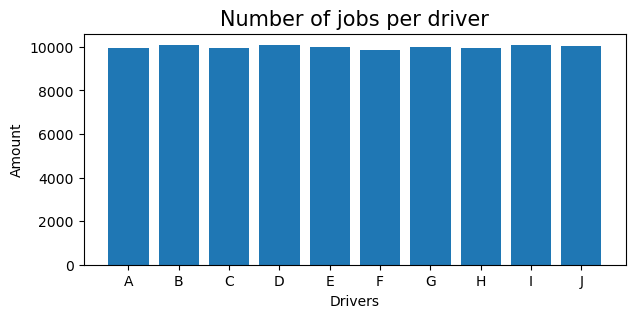

In [9]:
# count each drivers routes (each route is one job)
drivers_count_list = [driver_jobs.count(driver) for driver in drivers]
drivers_count_dict = {drivers[driver]: drivers_count_list[driver] for driver in range(len(drivers))}

#display(drivers_count_dict)
for driver in drivers: print('driver_{}: {}'.format(driver, drivers_count_dict[driver]))

# plot
plt.figure(figsize=(7, 3))
plt.bar(drivers_count_dict.keys(), drivers_count_dict.values())
#plt.ylim(0, number_of_actual_routes/len(drivers))
plt.xlabel('Drivers')
plt.ylabel('Amount')
plt.title('Number of jobs per driver', size=15)
plt.show()

### **Create YAML-files** ###

In [10]:
# set working directory
%cd "C:\Users\Dennis\OneDrive\Dokumente\03_Master\06_Kurse\07_UniTrento\02_Data_Mining\03_github"
file1 = 'standardroutes.yaml'
file2 = 'actual_routes.yaml'

with open(file1, 'w') as file:
    yaml.dump(standardroutes, file)

with open(file2, 'w') as file:
    yaml.dump(actual_routes, file)

print(f"YAML files '{file1}' and '{file2}' have been successfully created.")

C:\Users\Dennis\OneDrive\Dokumente\03_Master\06_Kurse\07_UniTrento\02_Data_Mining\03_github
YAML files 'standardroutes.yaml' and 'actual_routes.yaml' have been successfully created.


In [11]:
#sys.exit()

### **Read the YAML-files with standardroutes and actual routes** ###

In [12]:
with open('standardroutes.yaml', 'r') as file:
    standardroutes_yaml = yaml.safe_load(file)

with open('actual_routes.yaml', 'r') as file:
    actual_routes_yaml = yaml.safe_load(file)

In [13]:
# get all actual routes of one standardroute
route_id = 's2'
indizes = [i['sroute'] == route_id for i in actual_routes_yaml]
[route for route, index in zip(actual_routes_yaml, indizes) if index]

[{'driver': 'F',
  'id': 'a5001',
  'route': [{'from': 'Napoli',
    'mercandise': {'Meat': 16,
     'Milk': 6,
     'Pasta': 2,
     'Pens': 13,
     'Tomatoes': 21,
     'Water': 7},
    'to': 'Modena'},
   {'from': 'Modena',
    'mercandise': {'Beer': 29,
     'Cheese': 21,
     'Honey': 21,
     'Meat': 9,
     'Pens': 29,
     'Water': 11},
    'to': 'Venezia'},
   {'from': 'Venezia',
    'mercandise': {'Apples': 29,
     'Carrots': 4,
     'Chocolate': 9,
     'Honey': 20,
     'Milk': 4,
     'Potatoes': 3},
    'to': 'Rome'},
   {'from': 'Rome',
    'mercandise': {'Butter': 6,
     'Milk': 10,
     'Potatoes': 4,
     'Rice': 29,
     'Tomatoes': 19},
    'to': 'Pisa'},
   {'from': 'Pisa',
    'mercandise': {'Beer': 22, 'Bread': 17, 'Cheese': 24, 'Honey': 12},
    'to': 'Milano'}],
  'sroute': 's2'},
 {'driver': 'C',
  'id': 'a5002',
  'route': [{'from': 'Napoli',
    'mercandise': {'Meat': 16,
     'Milk': 6,
     'Pasta': 2,
     'Pens': 13,
     'Tomatoes': 21,
     'Water':

In [14]:
# get all actual routes of one driver
driver = 'A'
indizes = [i['driver'] == driver for i in actual_routes_yaml]
[route for route, index in zip(actual_routes_yaml, indizes) if index]

[{'driver': 'A',
  'id': 'a4',
  'route': [{'from': 'Napoli',
    'mercandise': {'Fish': 21, 'Pasta': 7, 'Rice': 7, 'Tomatoes': 10},
    'to': 'Milano'},
   {'from': 'Milano',
    'mercandise': {'Milk': 15, 'Potatoes': 23, 'Tea': 21, 'Tomatoes': 18},
    'to': 'Verona'},
   {'from': 'Verona',
    'mercandise': {'Carrots': 7,
     'Potatoes': 6,
     'Rice': 15,
     'Water': 9,
     'Yogurt': 2},
    'to': 'Torino'},
   {'from': 'Torino',
    'mercandise': {'Chocolate': 21, 'Fish': 22, 'Honey': 20, 'Yogurt': 28},
    'to': 'Bergamo'},
   {'from': 'Bergamo',
    'mercandise': {'Cheese': 17, 'Tomatoes': 19, 'Yogurt': 8},
    'to': 'Lecce'}],
  'sroute': 's1'},
 {'driver': 'A',
  'id': 'a9',
  'route': [{'from': 'Modena',
    'mercandise': {'Beer': 4,
     'Butter': 2,
     'Milk': 19,
     'Potatoes': 21,
     'Tomatoes': 29,
     'Water': 12},
    'to': 'Napoli'},
   {'from': 'Napoli',
    'mercandise': {'Bananas': 17,
     'Fish': 21,
     'Pasta': 7,
     'Rice': 7,
     'Tomatoes': 1

### **Syntax of standardroutes and actual routes** ###

In [18]:
### STANDARDROUTES ###

# [
# 	{id:s5, route:[
# 		{from:‘Rome’, to:‘Milan’, merchandise: {milk:3, pens:10, butter:20}},
# {from:‘Milan’, to:‘Verona’, merchandise: {milk:5, honey:9, butter:10, tomatoes:20}}, 
# {from:‘Verona’, to:‘Venezia’, merchandise:{butter:7, pens:2, tomatoes:10}}
# ]
# }, 

# {id:s10, route:[
# 		{from:‘Rome’, to:‘Milan’, merchandise: {milk:2, pens:10, butter:20}},
# {from:‘Milan’, to:‘Verona’, merchandise: {milk:5, tomatoes:24}}, 
# {from:‘Verona’, to:‘Venezia’, merchandise:{butter:7, bread:2, tomatoes:10}}
# ]
# },

# ]

In [19]:
### ACTUAL ROUTES ###

# [
# {id:a25, driver:C, sroute:s5, route:[
# {from:‘Rome’, to:‘Milan’, merchandise: {milk:4, pens:4, butter:20}},
# {from:‘Milan’, to:‘Bergamo’, merchandise: {milk:5, honey:19, butter:10, tomatoes:20}},
# {from:‘Bergamo’, to:‘Venezia’, merchandise:{butter:47, pens:2, tomatoes:1}}
# ]
# },
# {id:a13, driver:E, sroute:s10, route:[
# {from:‘Bolzano’, to:‘Milan’, merchandise: {milk:2, pens:10, butter:22}},
# {from:‘Milan’, to:‘Verona’, merchandise: {milk:15, tomatoes:4}},
# {from:‘Verona’, to:‘Venezia’, merchandise:{butter:7, bread:21, tomatoes:10}}
# ]
# },
# ]